<a href="https://colab.research.google.com/github/noushadkhan01/Basic-Mathematics-for-Machine-Learning/blob/master/Kaggle%20Competition/titanic%20survival/filled%20age%20by%20linear%20rgression%20with%20all%20variables%20top%20score%20is%200.788%20on%201%20november.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error,precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
!ls

sample_data


In [3]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 235kB 5.9MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noushadkhan","key":"fe4526bd4a314a15e1b0f4f2e43b0713"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [10]:
import kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 28.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 4.10MB/s]


In [269]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [271]:
train.shape, test.shape

((891, 12), (418, 11))

In [272]:
combined = pd.concat([train.drop('Survived', 1), test], 0)
combined.shape

(1309, 11)

## check for null values

In [0]:
datasets = [train, test]

In [0]:
train.name = 'Train'
test.name = 'Test'

In [275]:
for dataset in datasets:
  print(f'null values in {dataset.name} are \n {dataset.isnull().sum().sort_values(ascending = False)[:5]}\n')
  print()

null values in Train are 
 Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64


null values in Test are 
 Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
dtype: int64




#Fill Age

In [276]:
combined.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [277]:
combined.shape

(1309, 11)

In [279]:
combined.isnull().sum().sort_values(ascending = False)[:4]

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [280]:
combined.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
combined.shape

(1309, 9)

In [281]:
combined.Embarked.fillna(combined.Embarked.mode()[0], inplace = True)
combined.Fare.fillna(combined.Fare.median(), inplace = True)
combined.isnull().sum().sort_values(ascending = False)[:4]

Age         263
Embarked      0
Fare          0
Parch         0
dtype: int64

### text processing on Name column

In [282]:
combined.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [283]:
combined['Title'] = combined.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(combined['Title'], combined['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


We can replace many titles with a more common name or classify them as **Rare.**



In [0]:
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

In [287]:
combined.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs


In [288]:
combined[~combined.Age.isnull()][['Title', 'Age']].groupby('Title', as_index = False).mean()

,Title,Age
0,Master,5.482642
1,Miss,21.824366
2,Mr,32.252151
3,Mrs,36.918129
4,Rare,45.178571


In [289]:
combined['Family_Size'] = combined['SibSp'] + combined['Parch']
combined.drop(['SibSp', 'Parch'], 1, inplace = True)
combined.head(1)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,Family_Size
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.25,S,Mr,1


In [0]:
combined.drop(['Name'], 1, inplace = True)

In [307]:
combined['IsAlone'] = 0
combined['IsAlone'] = combined['Family_Size'].apply(lambda x: 1 if x == 0 else 0)
combined.drop('Family_Size', 1, inplace = True)
combined.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,3,male,22.0,7.2500,S,Mr,0
1,2,1,female,38.0,71.2833,C,Mrs,0


In [308]:
combined.IsAlone.unique()

array([0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


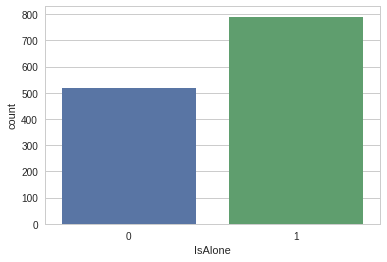

In [309]:
sns.countplot(combined.IsAlone)

In [310]:
combined_train = combined[~combined.Age.isnull()]
combined_train.shape

(1046, 8)

In [311]:
combined_test = combined[combined.Age.isnull()].drop('Age', axis = 1)
combined_test.shape

(263, 7)

In [522]:
age_train = combined_train.copy()
age_test = combined_test.copy()
age_train.shape, age_test.shape

((1046, 8), (263, 7))

In [523]:
age_test.drop(['PassengerId'], 1, inplace = True)
age_test = pd.get_dummies(age_test, drop_first = True)
age_test.head()

,Pclass,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
5,3,8.4583,1,1,1,0,0,1,0,0
17,2,13.0000,1,1,0,1,0,1,0,0
19,3,7.2250,1,0,0,0,0,0,1,0
26,3,7.2250,1,1,0,0,0,1,0,0
28,3,7.8792,1,0,1,0,1,0,0,0


In [0]:
age_train.drop('PassengerId', 1, inplace = True)

In [525]:
age_train = pd.get_dummies(age_train, drop_first = True)
age_train.head()

,Pclass,Age,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,7.2500,0,1,0,1,0,1,0,0
1,1,38.0,71.2833,0,0,0,0,0,0,1,0
2,3,26.0,7.9250,1,0,0,1,1,0,0,0
3,1,35.0,53.1000,0,0,0,1,0,0,1,0
4,3,35.0,8.0500,1,1,0,1,0,1,0,0


In [0]:
import scipy.stats as st

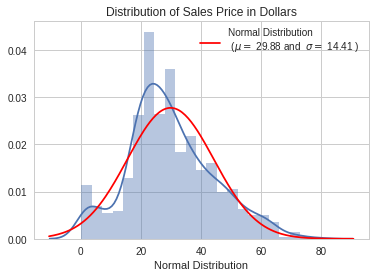

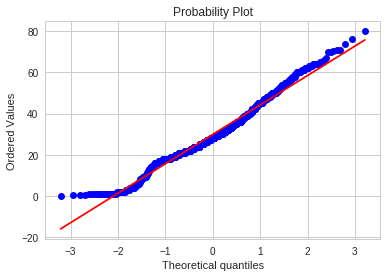

In [527]:
sns.set_style('whitegrid')
sns.distplot(age_train.Age, axlabel="Normal Distribution", fit=st.norm, fit_kws={"color":"red"})
plt.title('Distribution of Sales Price in Dollars')
(mu, sigma) = st.norm.fit(age_train.Age)
plt.legend(['Normal Distribution \n ($\mu=$ {:.2f} and  $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best', fancybox=True)
plt.show()

st.probplot(age_train.Age, plot=plt)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


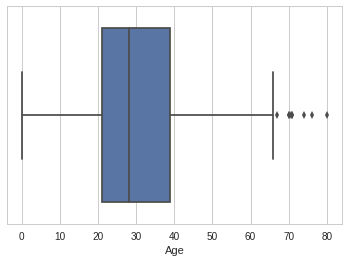

In [528]:
sns.boxplot(age_train.Age)

In [529]:
age_train = age_train[age_train.Age < 65]
age_train.shape

(1033, 11)

In [530]:
age_train.head(2)

,Pclass,Age,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,7.2500,0,1,0,1,0,1,0,0
1,1,38.0,71.2833,0,0,0,0,0,0,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


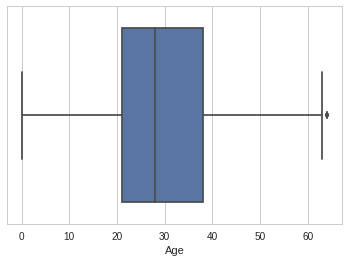

In [531]:
sns.boxplot(age_train.Age)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


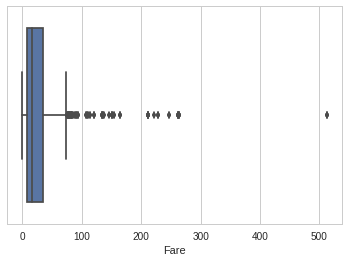

In [532]:
sns.boxplot(age_train.Fare)

**^^it look like normally distributed**

In [533]:
y2 = age_train.Fare
y2 = np.log1p(y2)
#y2 = np.sqrt(y2)
y2.skew()

0.6297205061227843

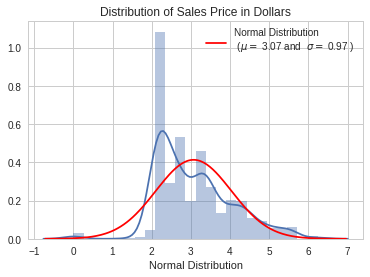

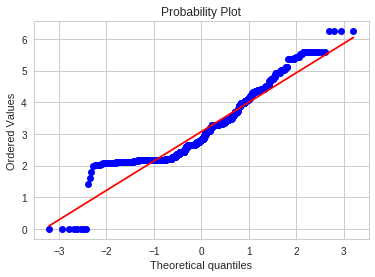

In [534]:
sns.set_style('whitegrid')
sns.distplot(y2, axlabel="Normal Distribution", fit=st.norm, fit_kws={"color":"red"})
plt.title('Distribution of Sales Price in Dollars')
(mu, sigma) = st.norm.fit(y2)
plt.legend(['Normal Distribution \n ($\mu=$ {:.2f} and  $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best', fancybox=True)
plt.show()

st.probplot(y2, plot=plt)
plt.show()

In [0]:
age_train['Fare'] = np.log1p(age_train.Fare)
age_test['Fare'] = np.log1p(age_test.Fare)

In [536]:
age_train.shape, age_test.shape

((1033, 11), (263, 10))

In [537]:
age_train.head(1)

,Pclass,Age,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,2.110213,0,1,0,1,0,1,0,0


In [538]:
age_test.head(1)

,Pclass,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
5,3,2.246893,1,1,1,0,0,1,0,0


In [0]:
X = age_train.drop('Age', 1)
y = age_train.Age

In [540]:
X.head(1)

,Pclass,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,2.110213,0,1,0,1,0,1,0,0


# Train model

## 1.Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score

In [543]:
y[:3]

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64

In [544]:
y.skew()

0.25917966885504756

In [545]:
X.head(2)

,Pclass,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,2.110213,0,1,0,1,0,1,0,0
1,1,4.280593,0,0,0,0,0,0,1,0


In [546]:
X.shape, y.shape

((1033, 10), (1033,))

In [561]:
cv = cross_val_score(LinearRegression().fit(X, y), X, y, cv = 10)
cv, np.mean(cv)

(array([0.43317022, 0.43988361, 0.28927352, 0.36729295, 0.42544362,
        0.37333961, 0.50890831, 0.43238331, 0.468185  , 0.40017169]),
 0.41380518354454754)

In [566]:
model = LinearRegression().fit(X, y)
model.score(X, y)

0.4349772523184109

In [565]:
X.head(1)

,Pclass,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,2.110213,0,1,0,1,0,1,0,0


In [563]:
age_test.head(2)

,Pclass,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
5,3,2.246893,1,1,1,0,0,1,0,0
17,2,2.639057,1,1,0,1,0,1,0,0


In [564]:
X.shape, age_test.shape

((1033, 10), (263, 10))

In [567]:
age_pred = model.predict(age_test)
print(age_pred[:10])

[32.58193483 34.39449693 31.91180333 27.28923109 22.30967821 28.37208836
 41.13022412 22.3025168  27.28948051 27.3275358 ]


In [568]:
combined[combined.Age.isnull()].head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
5,6,3,male,NaN,8.4583,Q,Mr,1
17,18,2,male,NaN,13.0000,S,Mr,1


In [569]:
combined.Age[combined.Age.isnull()] = age_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [570]:
combined.iloc[5].Age

32.581934832777364

In [571]:
combined.iloc[17].Age

34.39449692663375

In [572]:
pd.DataFrame(model.coef_, columns = ['Coefficient'], index = X.columns)

,Coefficient
Pclass,-5.800851
Fare,0.488574
IsAlone,3.793693
Sex_male,5.008133
Embarked_Q,5.224443
Embarked_S,1.044553
Title_Miss,16.986646
Title_Mr,22.219901
Title_Mrs,31.850606
Title_Rare,30.067921


In [573]:
combined.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,3,male,22.0,7.2500,S,Mr,0
1,2,1,female,38.0,71.2833,C,Mrs,0


In [577]:
train = pd.read_csv('train.csv')
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [578]:
target = train.Survived
target[:3]

0    0
1    1
2    1
Name: Survived, dtype: int64

In [579]:
train.shape

(891, 12)

In [580]:
train = combined[:len(train)]
train['Survived'] = target
train.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Survived
0,1,3,male,22.0,7.2500,S,Mr,0,0
1,2,1,female,38.0,71.2833,C,Mrs,0,1


In [581]:
train.shape

(891, 9)

In [603]:
test = combined[len(train):]
test.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,male,34.5,7.8292,Q,Mr,1
1,893,3,female,47.0,7.0000,S,Mrs,0


In [604]:
Id = test.PassengerId
Id.shape

(418,)

In [605]:
sum(train.isnull().sum())

0

In [606]:
sum(test.isnull().sum())

0

In [607]:
X = train.drop(['PassengerId', 'Survived'], 1)
y = train.Survived
X.shape, y.shape

((891, 7), (891,))

In [608]:
test.drop('PassengerId', 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [609]:
test.shape

(418, 7)

In [610]:
test.head(1)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,male,34.5,7.8292,Q,Mr,1


#get dummies

In [0]:
X = pd.get_dummies(X, drop_first = True)
test = pd.get_dummies(test, drop_first = True)

In [612]:
X.shape, test.shape

((891, 11), (418, 11))

# DecisionTreeClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [614]:
tree = DecisionTreeClassifier(max_depth = 3).fit(X, y)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [615]:
tree.score(X, y)

0.8372615039281706

In [616]:
cv = cross_val_score(tree, X, y, cv = 10)
cv

array([0.82222222, 0.83333333, 0.7752809 , 0.85393258, 0.85393258,
       0.80898876, 0.80898876, 0.78651685, 0.87640449, 0.86363636])

In [617]:
np.mean(cv)

0.8283236863012144

In [618]:
y_predicted = tree.predict(test)
y_predicted[:3]

array([0, 1, 0])

In [619]:
y_predicted.shape

(418,)

In [620]:
submission = pd.DataFrame()
submission['PassengerId'] = Id
submission['Survived'] = y_predicted
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
submission.to_csv('Submission_dTree.csv', index = False)

In [623]:
!ls

gender_submission.csv  sample_data	     test.csv
kaggle.json	       Submission_dTree.csv  train.csv


In [625]:
pd.read_csv('Submission_dTree.csv').head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [626]:
submission.shape

(418, 2)

In [627]:
!kaggle competitions submit -c titanic -f Submission_dTree.csv -m "Message"

100% 2.77k/2.77k [00:00<00:00, 7.70kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster